<a href="https://colab.research.google.com/github/deanhoperobertson/NLP-Text-Classifiation-/blob/master/Text_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import urllib.request
import pandas as pd
import urllib

#vizualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Text Preprocessing
from bs4 import BeautifulSoup
import unicodedata
import string
import re

from sklearn import model_selection
from sklearn.model_selection import train_test_split



In [0]:
#import data from my github repo
url = "https://raw.githubusercontent.com/deanhoperobertson/NLP-Text-Classifiation-/master/corpus.txt"
data = urllib.request.urlopen(url).read()
data = data.decode('utf-8')

In [0]:
labels, texts = [], []
for i, line in enumerate(str(data).split("\n")):
    content = line.replace("\\","").split()
    labels.append(content[0])
    texts.append(" ".join(content[1:]))

# create a dataframe using texts and lables
trainDF = pd.DataFrame()
trainDF['text'] = texts
trainDF['label'] = labels

In [4]:
trainDF.head()

,text,label
0,Stuning even for the non-gamer: This sound tra...,__label__2
1,The best soundtrack ever to anything.: I'm rea...,__label__2
2,Amazing!: This soundtrack is my favorite music...,__label__2
3,Excellent Soundtrack: I truly like this soundt...,__label__2
4,"Remember, Pull Your Jaw Off The Floor After He...",__label__2


## Text PreProcessing (Cleaning)

Here we focus on cleaning up text by:
- Remove upper case characters
- Remove HTML tags
- Remove punctuation
- Remove special characters

In [0]:
#remove upper cases letters
def lower_case(text):
  return text.str.lower()

#remove html tags
def strip_html(text):
  soup = BeautifulSoup(text, "html.parser")
  stripped_text = soup.get_text()
  return stripped_text

#remove punctuation
def remove_punctuation(text):
  return ''.join([char for char in text if char == '-' or char not in string.punctuation])

#remove special characters
def remove_spec(text):
  return text.replace(r'^[*-]', '')

#remove accented characters
def remove_accented_chars(text):
  nfkd_form = unicodedata.normalize('NFKD', text)
  only_ascii = nfkd_form.encode('ASCII', 'ignore').decode('utf-8', 'ignore')
  return only_ascii

In [74]:
# now to apply all the text cleaning methods

trainDF['text'] = lower_case(trainDF['text'])

trainDF['text'] = trainDF['text'].apply(strip_html)

trainDF['text'] = trainDF['text'].apply(remove_punctuation)

trainDF['text'] = trainDF['text'].apply(remove_spec)


0       stuning even for the non-gamer this sound trac...
1       the best soundtrack ever to anything im readin...
2       amazing this soundtrack is my favorite music o...
3       excellent soundtrack i truly like this soundtr...
4       remember pull your jaw off the floor after hea...
5       an absolute masterpiece i am quite sure any of...
6       buyer beware this is a self-published book and...
7       glorious story i loved whisper of the wicked s...
8       a five star book i just finished reading whisp...
9       whispers of the wicked saints this was a easy ...
10      the worst a complete waste of time typographic...
11      great book this was a great booki just could n...
12      great read i thought this book was brilliant b...
13      oh please i guess you have to be a romance nov...
14      awful beyond belief i feel i have to write to ...
15      dont try to fool us with fake reviews its glar...
16      a romantic zen baseball comedy when you hear f...
17      fashio

## Train/Test Split

We need to split the dataset into a training and test dataset. It is common practice to use a 80/20 split between train/test dataset. One should split the dataset before using any resampling methods (up-sample/under-sample) to resolved a class imbalance to reduce the chance of deplicating observations. 

In [0]:
#split into train and test set (default is 25%)
#set seed for consistency
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(trainDF['text'], trainDF['label'], test_size=0.25, random_state=1)

## Balance Classes

It is important to check that target category classes are balanced. IThere is much debate as to why it is better to have balanced classes, but without balanced classes one will train a model that is bias. As a conclusion, artificial balancing is rarely useful if training set is large enough.In my personal experience - balancing classes has resulted in better model performance. 

In this case the classes are close enough to called "balanced" and thus no resampling mehods are required. 

In [20]:
#number of classes
trainDF['label'].value_counts()

__label__1    5097
__label__2    4903
Name: label, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


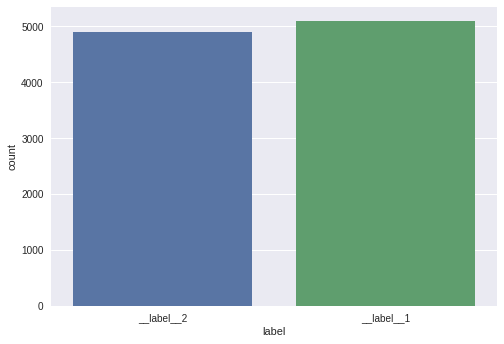

In [16]:
#number of classes
sns.countplot(x="label" ,data=trainDF, ax=None)

In [19]:
#Number of unique words
trainDF['label'].value_counts()

__label__1    5097
__label__2    4903
Name: label, dtype: int64

## Text PreProcessing (Cleaning)

Here we focus on cleaning up text by:
- Remove upper case characters
- Remove HTML tags
- Remove punctuation
- Remove special characters

In [51]:
remove_punctuation(trainDF['text'].head())

'Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^The best soundtrack ever to anything.: I\'m reading a lot of reviews saying that this is the best \'game soundtrack\' and I figured that I\'d write a review to disagree a bit. This in my opinino is Yasunori Mitsuda\'s ultimate masterpiece. The music is timeless and I\'m been listening to it for years now and its beauty simply refuses to fade.The price tag on this is pretty staggering I must say, but if you are going to buy any cd for this much money, this is the only one that I feel would be worth every penny.Amazing!: This soundtrack is my favorite music of all time